# DataMapPlot Label Placement Options

This notebook will walk you through some of the label placement customization options that are available in DataMapPlot. To get started we'll need to import DataMapPlot. Also, for the purposes of this documentation, I need to keep the image sizes smaller to fit in readthedocs; because of that I will set the global DPI for matplotlib (which DataMapPlot uses for plotting), but you should probably remove those lines if you are running this notebook yourself.

In [1]:
# Ensure we don't generate large images for inline docs
# You probably want to remove this if running the notebook yourself
import matplotlib

matplotlib.rcParams["figure.dpi"] = 72

import datamapplot

To demonstrate what DataMapPlot can do we'll need some data. The examples directory of the DataMapPlot repository contains some pre-prepared datasets for experimenting with. We'll grab one of those. For this example we'll use data about Wikipedia. The original data that this was derived from is the Wikipedia embeddings generated by Cohere using their embed system to generate paragraph embeddings.

In [2]:
import numpy as np
import requests
import io

data_map_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/Wikipedia-data_map.npy"
)
wikipedia_data_map = np.load(io.BytesIO(data_map_file.content))
label_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/Wikipedia-cluster_labels.npy"
)
wikipedia_labels = np.load(io.BytesIO(label_file.content), allow_pickle=True)

Let's start by making the most basic DataMapPlot output based on this data so we have an idea of what the starting point looks like, and can better understand what the various customizations we will be applying can do for us.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

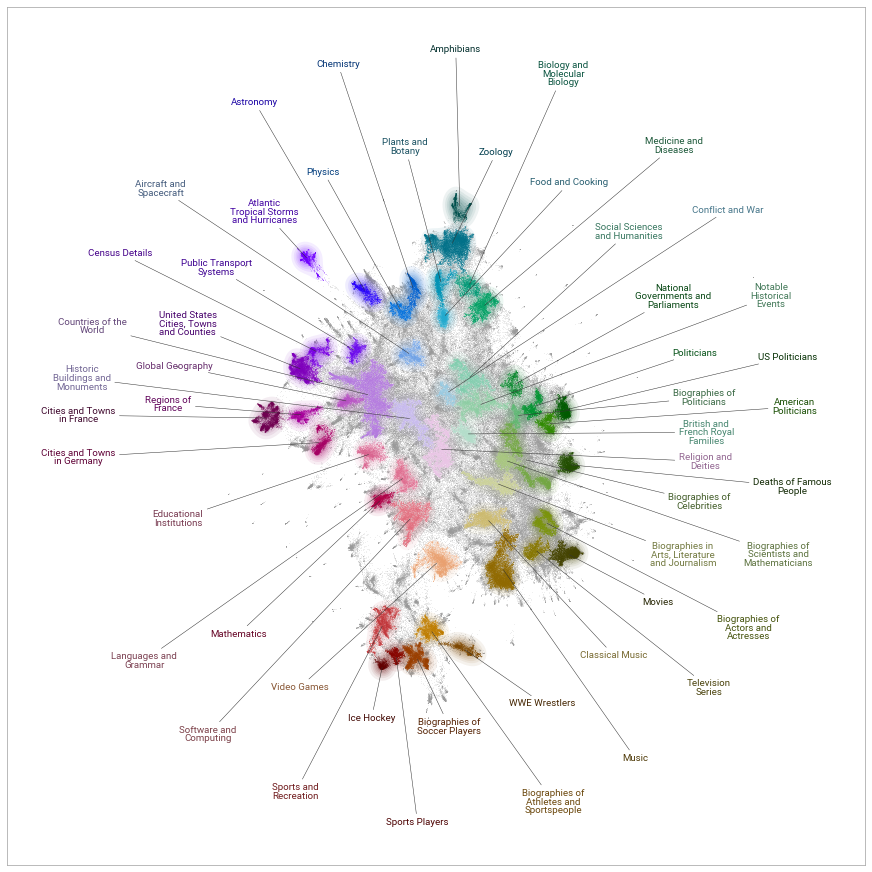

In [3]:
datamapplot.create_plot(wikipedia_data_map, wikipedia_labels)

One of the main features of DataMapPlot is its ability to find good label placements and arrange the label text in a way that avoids overlaps wherever possible. The algorithm for doing this is quite custom and involves a mix of heuristics and optimization algorithms. As such DataMapPlot does not offer a lot of ways to manually place labels, or otherwise significantly modify label placement, as this would cause problems for the heuristic and optimization patchwork that does the heavy lifting. What is available is a few controls that can be used to somewhat tweak label placement, and may be useful if you have mostly what you want, but there are some minor label overlaps or similar that are causing problems.

The first of these is the ``label_direction_bias``. At the initial layout stage DataMapPlot places labels in rings around the scatterplot. Since text labels are usually wider than they are tall (for text that reads horizontally) it is easier to pack more labels near the east and west cardinal points of the data map, and harder to pack together labels to the north and south. Because of this there is a "direction bias" applied that places more labels toward the sides of the ring, and fewer labels toward the top and bottom. The ``label_direction_bias`` determines how biased this initial placement is. A bias value of 1.0 means that labels will be evenly distributed around the circle. High bias values will try to pack more labels to the sides, making more room at the top and bottom.

Let's see how this works by setting the ``label_direction_bias`` to ``1.0``:

(<Figure size 864x864 with 1 Axes>, <Axes: >)

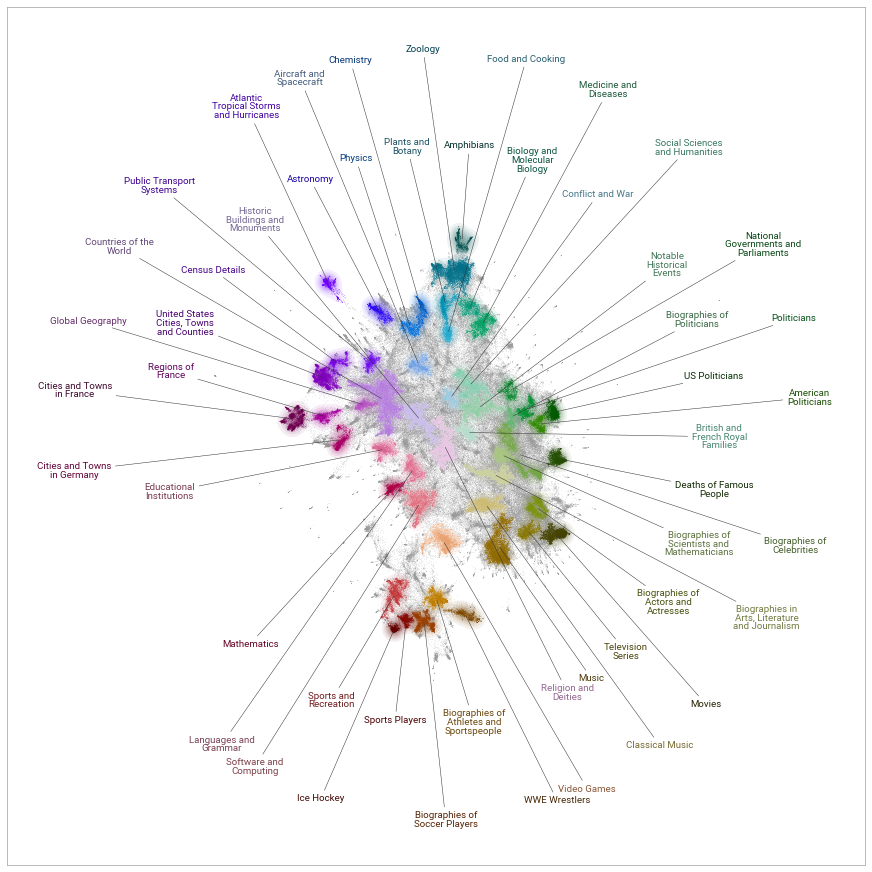

In [4]:
datamapplot.create_plot(wikipedia_data_map, wikipedia_labels, label_direction_bias=1.0)

As you can see we have more labels at the top and bottom than our initial plot. The collision detection and optimization that follows the initial placement has managed to spread these out, but we still end up with labels that *appear* more packed together simply do to the width versus heigh bias of the text of the labels.

In contrast we can increase the ``label_direction_bias`` to ``2.0`` to see the inverse effect:

(<Figure size 864x864 with 1 Axes>, <Axes: >)

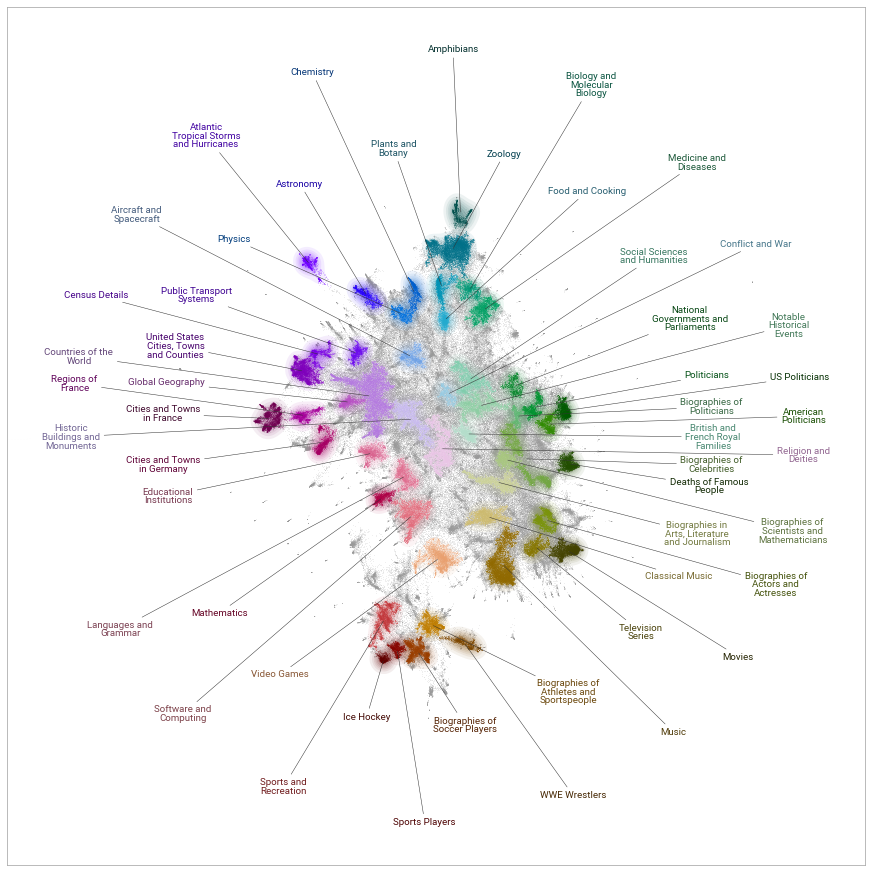

In [5]:
datamapplot.create_plot(wikipedia_data_map, wikipedia_labels, label_direction_bias=2.0)

Now we have spread out the labels at the top and the bottom, but have created quite a bit of crowding on the right side to allow for this. In general values of 1.0 and 2.0 represent the more extreme ends one wants to use; you will be much better served by making small tweaks to the default value of 1.5 to subtley adjust the initial placement and hopefully end up with a better final layout that way.

The second method of controlling placement is the ``label_margin_factor``. During the optimization phase when labels are being shifted to attempt to avoid overlaps there is a margin around the exact bounding box of the text that is used for collision/overlap detection. The ``label_margin_factor`` controls how large that margin is. A value of 1.0 makes the bounding box tight (and smaller values will reduce the bounding box to be smaller than the text), while a value of 2.0 will double the size of the bounding box. This means you can adjust the ``label_margin_factor`` to attempt to coerce the optimization phase to spread the labels out as you wish. In practice this is a little delicate. We can look at what happens with a value of 1.0 and see what happens:

(<Figure size 864x864 with 1 Axes>, <Axes: >)

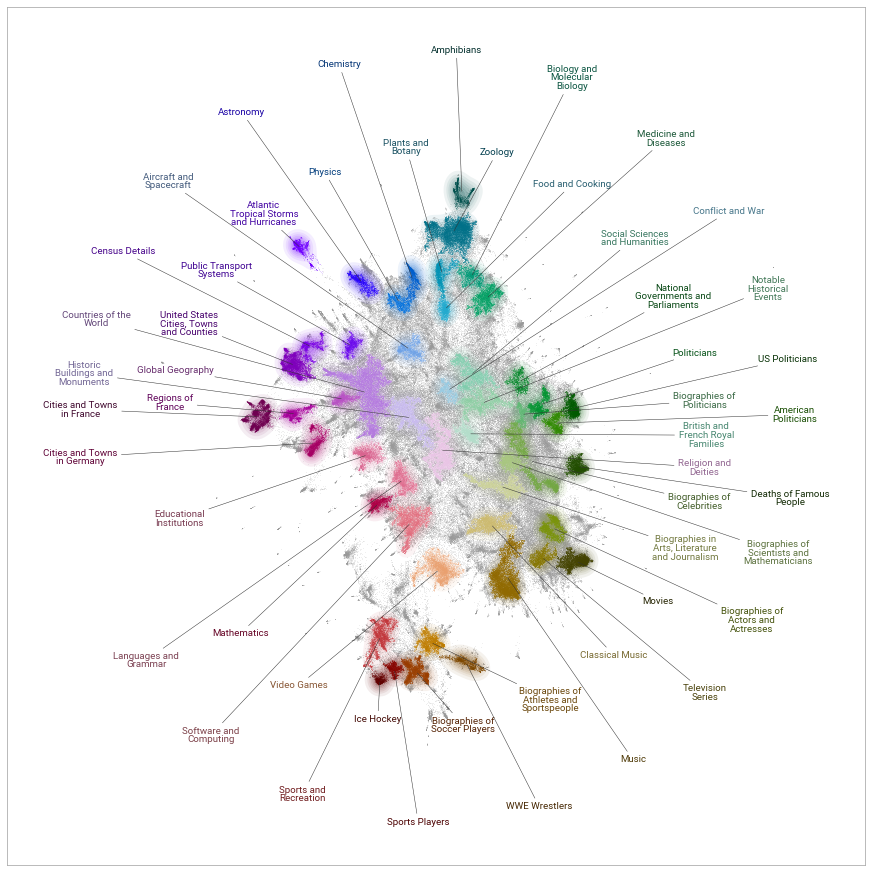

In [6]:
datamapplot.create_plot(wikipedia_data_map, wikipedia_labels, label_margin_factor=1.0)

The result is more tightly packed labels, particularly with regard to indicator lines crossing the corners of the text labels. Still if you are willing to let things get packed tightly and accept minor overlaps occasionally this can get the job done.

In contrast let's try a value of 2.0 for the ``label_margin_factor``.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

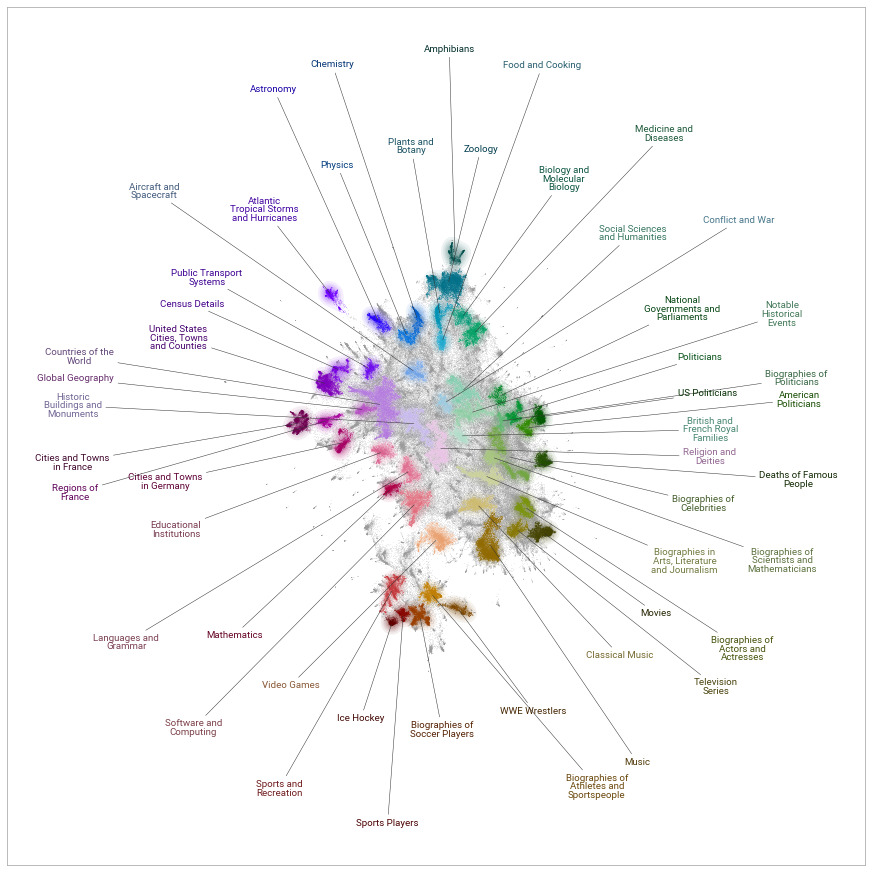

In [7]:
datamapplot.create_plot(wikipedia_data_map, wikipedia_labels, label_margin_factor=2.0)

Here we have most of the labels well spread but, with such large bounding boxes, it is often the case the the naive optimization algorithm can't find a good solution. The result is that while many labels are well spread out, we have occasional failures with clear overlaps and poor placement. If you have few labels and plenty of space a ``label_margin_factor`` this large might work, but for this many labels it is simply asking too much. However with a bit of experimentation you may be able to find a value that tweaks the layout enough to give you what you are looking for.

A final degree of control in the ``label_base_radius``. Since labels are placed in rings around the core data map we need a starting radius for the first ring. Usually this is selected from the data itself, based on the distance from the center of the most outlying points. You can, however, control it directly. Note that you'll need to provide a radius *in data coordinates* from the center of the data map -- which can be hard to guess. However, if you know what you want you can do it. For example, we could pick a base radius that is smaller than the most outlying clusters and let DataMapPlot try to clean things up for us:

(<Figure size 864x864 with 1 Axes>, <Axes: >)

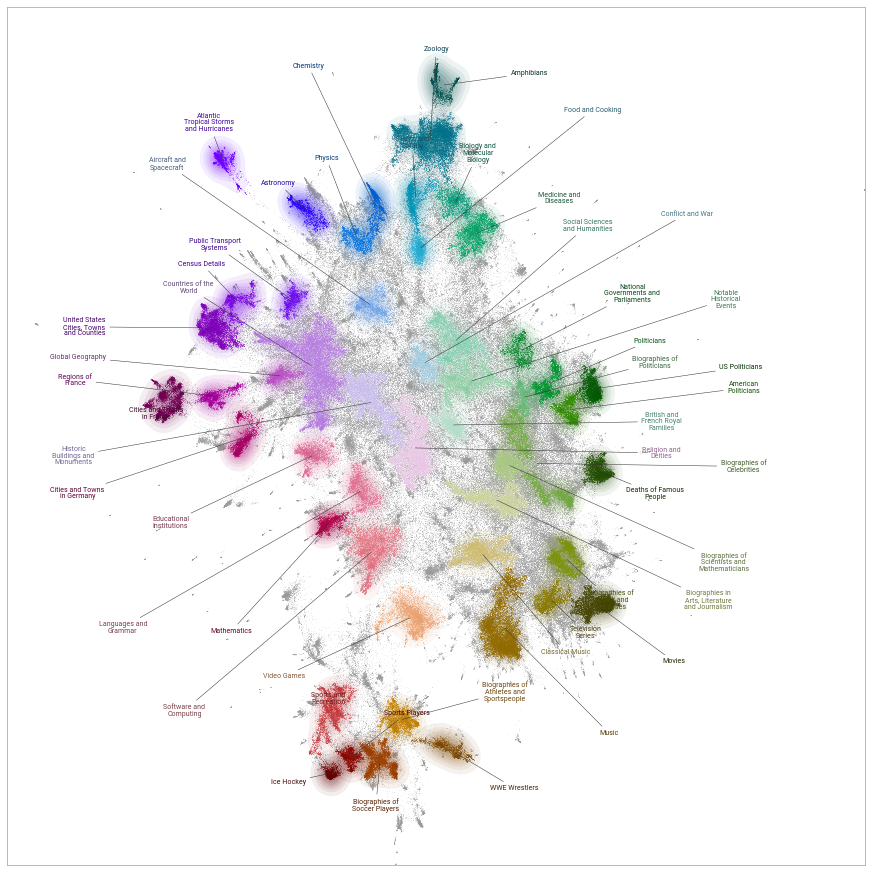

In [8]:
datamapplot.create_plot(wikipedia_data_map, wikipedia_labels, label_base_radius=5.0)

The result is not ideal, since we have text overlapping the data etc. But with a little work you may be able to find a better value than the default choice that DataMapPlot makes.